In [47]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

In [48]:
df = pd.read_csv("ALLData.csv", sep=",")

df.describe()



,OpenBTC,HighBTC,LowBTC,CloseBTC,VolumeBTC,Market CapBTC,OpenETH,HighETH,LowETH,CloseETH,...,LowXRP,CloseXRP,VolumeXRP,Market CapXRP,OpenXLM,HighXLM,LowXLM,CloseXLM,VolumeXLM,Market CapXLM
count,1031.000000,1031.000000,1031.000000,1031.000000,1.031000e+03,1.031000e+03,1031.000000,1031.000000,1031.000000,1031.000000,...,1031.000000,1031.000000,1.031000e+03,1.031000e+03,1031.000000,1031.000000,1031.000000,1031.000000,1.031000e+03,1.031000e+03
mean,3082.084248,3192.334384,2959.347042,3088.743598,2.086859e+09,5.132405e+10,194.809658,203.426189,185.300251,195.298739,...,0.207149,0.223242,2.930744e+08,8.623865e+09,0.068891,0.073895,0.063537,0.069138,3.339330e+07,1.212307e+09
std,4065.587139,4238.827656,3850.851684,4066.669479,3.818866e+09,6.862227e+10,292.282103,305.775515,276.460169,292.328854,...,0.394183,0.431568,8.988028e+08,1.676556e+10,0.143581,0.154225,0.131389,0.143689,1.010460e+08,2.630348e+09
min,210.070000,226.320000,199.570000,210.500000,1.271260e+07,3.053250e+09,0.431589,0.482988,0.420897,0.434829,...,0.004041,0.004090,2.481900e+04,1.371940e+08,0.001444,0.001509,0.001333,0.001444,4.910000e+02,7.920390e+06
25%,448.210000,452.460000,443.465000,448.155000,6.190015e+07,6.888885e+09,8.560000,8.845000,8.215000,8.600000,...,0.006274,0.006381,6.439845e+05,2.266490e+08,0.001930,0.002001,0.001878,0.001930,2.710400e+04,1.047890e+07
50%,898.170000,913.180000,879.810000,899.070000,1.477750e+08,1.445010e+10,13.030000,13.340000,12.560000,13.040000,...,0.007970,0.008076,2.471000e+06,2.772940e+08,0.002357,0.002488,0.002273,0.002357,1.375910e+05,1.541030e+07
75%,4325.725000,4403.835000,4162.455000,4333.185000,1.963160e+09,7.165380e+10,303.325000,311.710000,295.005000,303.735000,...,0.222283,0.235087,1.786245e+08,9.020975e+09,0.033141,0.037038,0.029870,0.033223,1.707455e+07,3.824105e+08
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.260000e+11,1397.480000,1432.880000,1290.600000,1396.420000,...,3.120000,3.380000,9.110440e+09,1.300000e+11,0.892399,0.938144,0.677496,0.896227,1.513270e+09,1.595360e+10


In [49]:
df

,Date,SymbolBTC,OpenBTC,HighBTC,LowBTC,CloseBTC,VolumeBTC,Market CapBTC,SymbolETH,OpenETH,...,CloseXRP,VolumeXRP,Market CapXRP,SymbolXLM,OpenXLM,HighXLM,LowXLM,CloseXLM,VolumeXLM,Market CapXLM
0,8/7/2015,BTC,278.74,280.39,276.37,279.58,42484800,4.032820e+09,ETH,2.830000,...,0.008152,363643,2.558950e+08,XLM,0.002524,0.002529,0.002428,0.002432,4101,12209600
1,8/8/2015,BTC,279.74,279.93,260.71,261.00,58533000,4.048270e+09,ETH,2.790000,...,0.008476,678295,2.604860e+08,XLM,0.002433,0.002523,0.002296,0.002419,22350,11768000
2,8/9/2015,BTC,261.12,267.00,260.47,265.08,23789600,3.779770e+09,ETH,0.706136,...,0.008808,531969,2.707020e+08,XLM,0.002421,0.002500,0.002321,0.002345,12956,11710100
3,8/10/2015,BTC,265.48,267.03,262.60,264.47,20979400,3.843850e+09,ETH,0.713989,...,0.008750,472973,2.811700e+08,XLM,0.002345,0.002595,0.002345,0.002466,17339,11345900
4,8/11/2015,BTC,264.34,270.39,264.09,270.39,25433900,3.828500e+09,ETH,0.708087,...,0.008591,282461,2.792200e+08,XLM,0.002466,0.002520,0.002381,0.002398,7245,11928900
5,8/12/2015,BTC,270.60,270.67,265.47,266.38,26815400,3.920210e+09,ETH,1.060000,...,0.008271,287463,2.741410e+08,XLM,0.002396,0.002501,0.002345,0.002380,21375,11592600
6,8/13/2015,BTC,266.18,266.23,262.84,264.08,27685500,3.857090e+09,ETH,1.220000,...,0.008147,202934,2.637720e+08,XLM,0.002379,0.002415,0.002231,0.002264,9789,11507500
7,8/14/2015,BTC,264.13,267.47,261.48,265.68,27091200,3.828340e+09,ETH,1.810000,...,0.008337,423163,2.599890e+08,XLM,0.002265,0.002345,0.002262,0.002314,11426,10955700
8,8/15/2015,BTC,265.53,266.67,261.30,261.55,19321100,3.849530e+09,ETH,1.800000,...,0.008420,176135,2.657900e+08,XLM,0.002313,0.002330,0.002261,0.002270,6685,11190400
9,8/16/2015,BTC,261.87,262.44,257.04,258.51,29717000,3.797330e+09,ETH,1.680000,...,0.008315,301654,2.686440e+08,XLM,0.002270,0.002288,0.002113,0.002135,15113,10979200


Text(0,0.5,'Frequency')

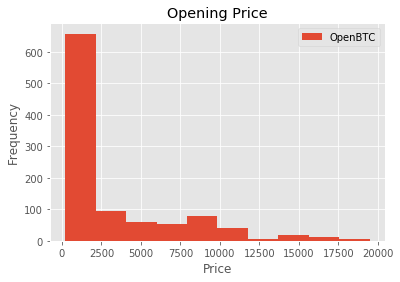

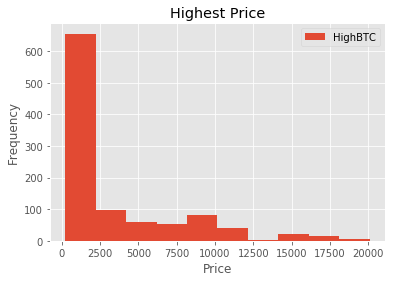

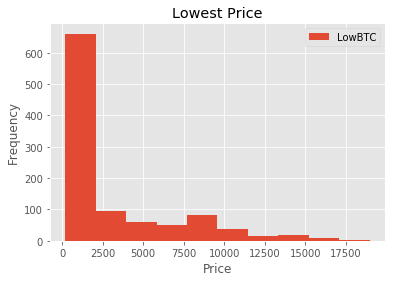

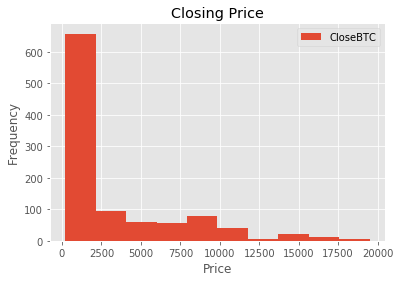

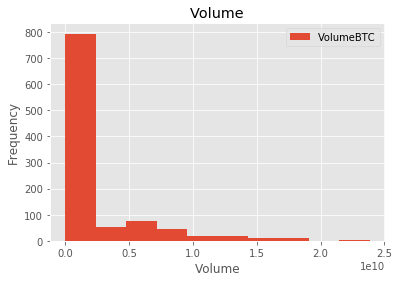

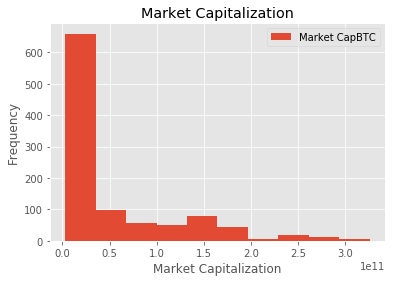

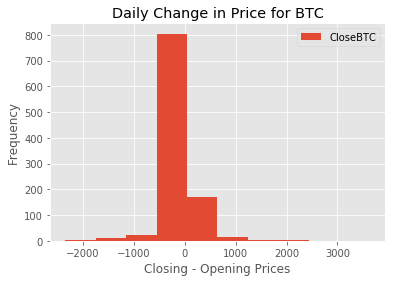

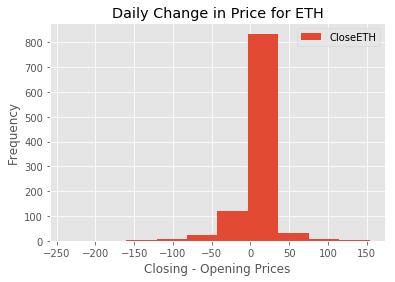

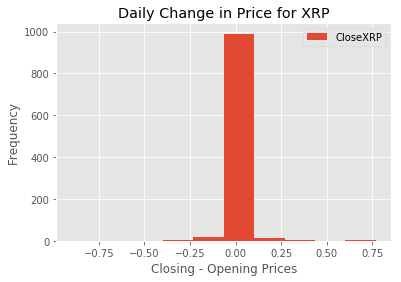

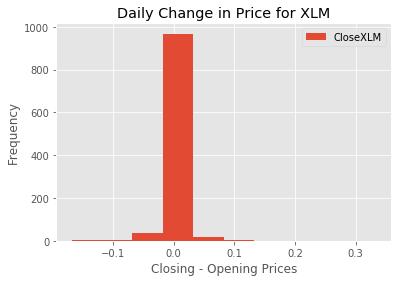

In [50]:
#BTC Values

plot = df.plot(y="OpenBTC",kind="hist")
plt.title('Opening Price')
plot.set_xlabel("Price")
plot.set_ylabel("Frequency")

plot = df.plot(y="HighBTC",kind="hist")
plt.title('Highest Price')
plot.set_xlabel("Price")
plot.set_ylabel("Frequency")

plot = df.plot(y="LowBTC",kind="hist")
plt.title('Lowest Price')
plot.set_xlabel("Price")
plot.set_ylabel("Frequency")

plot = df.plot(y="CloseBTC",kind="hist")
plt.title('Closing Price')
plot.set_xlabel("Price")
plot.set_ylabel("Frequency")

dfBTCDrop=df.dropna()
plot = dfBTCDrop.plot(y="VolumeBTC",kind="hist")
plt.title('Volume')
plot.set_xlabel("Volume")
plot.set_ylabel("Frequency")

plot = df.plot(y="Market CapBTC",kind="hist")
plt.title('Market Capitalization')
plot.set_xlabel("Market Capitalization")
plot.set_ylabel("Frequency")

#frequency change per day
dfSUBBTC = df[['CloseBTC']].sub(df['OpenBTC'], axis=0)
dfSUBETH = df[['CloseETH']].sub(df['OpenETH'], axis=0)
dfSUBXRP = df[['CloseXRP']].sub(df['OpenXRP'], axis=0)
dfSUBXLM = df[['CloseXLM']].sub(df['OpenXLM'], axis=0)

plot = dfSUBBTC.plot(y="CloseBTC",kind="hist")
plt.title('Daily Change in Price for BTC')
plot.set_xlabel("Closing - Opening Prices")
plot.set_ylabel("Frequency")

plot = dfSUBETH.plot(y="CloseETH",kind="hist")
plt.title('Daily Change in Price for ETH')
plot.set_xlabel("Closing - Opening Prices")
plot.set_ylabel("Frequency")

plot = dfSUBXRP.plot(y="CloseXRP",kind="hist")
plt.title('Daily Change in Price for XRP')
plot.set_xlabel("Closing - Opening Prices")
plot.set_ylabel("Frequency")

plot = dfSUBXLM.plot(y="CloseXLM",kind="hist")
plt.title('Daily Change in Price for XLM')
plot.set_xlabel("Closing - Opening Prices")
plot.set_ylabel("Frequency")




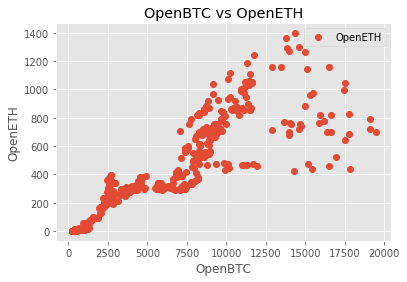

0.9238267498419244

In [51]:
#Scatterplots for BTC vs ETH Open-Open High-High Volume-Volume Open-Volume High-Volume 

df.plot(x='OpenBTC', y='OpenETH', style='o')  
plt.title('OpenBTC vs OpenETH')  
plt.xlabel('OpenBTC')  
plt.ylabel('OpenETH')  
plt.show()

df['OpenBTC'].corr(df['OpenETH'])

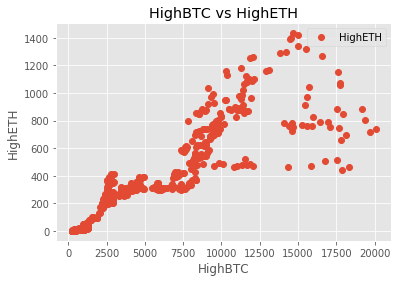

0.9221357815332382

In [52]:
df.plot(x='HighBTC', y='HighETH', style='o')  
plt.title('HighBTC vs HighETH')  
plt.xlabel('HighBTC')  
plt.ylabel('HighETH')  
plt.show()

df['HighBTC'].corr(df['HighETH'])

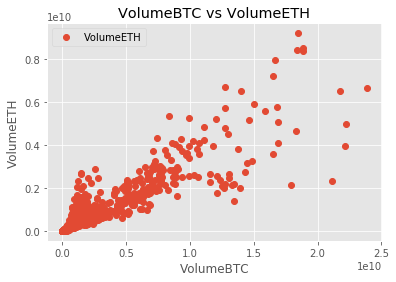

0.9073992205306892

In [53]:
df.plot(x='VolumeBTC', y='VolumeETH', style='o')  
plt.title('VolumeBTC vs VolumeETH')  
plt.xlabel('VolumeBTC')  
plt.ylabel('VolumeETH')  
plt.show()

df['VolumeBTC'].corr(df['VolumeETH'])

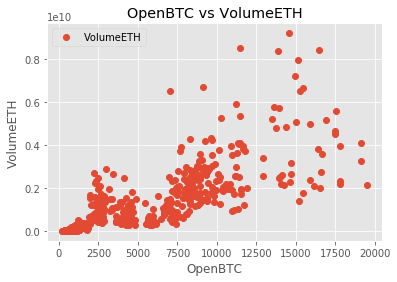

0.8419243237499053

In [54]:
df.plot(x='OpenBTC', y='VolumeETH', style='o')  
plt.title('OpenBTC vs VolumeETH')  
plt.xlabel('OpenBTC')  
plt.ylabel('VolumeETH')  
plt.show()

df['OpenBTC'].corr(df['VolumeETH'])

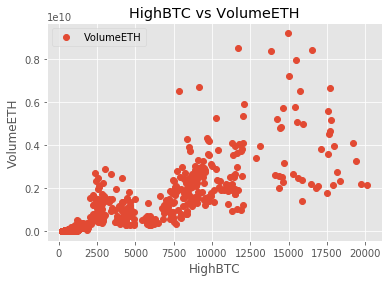

0.8390135460062619

In [55]:
df.plot(x='HighBTC', y='VolumeETH', style='o')  
plt.title('HighBTC vs VolumeETH')  
plt.xlabel('HighBTC')  
plt.ylabel('VolumeETH')  
plt.show()

df['HighBTC'].corr(df['VolumeETH'])

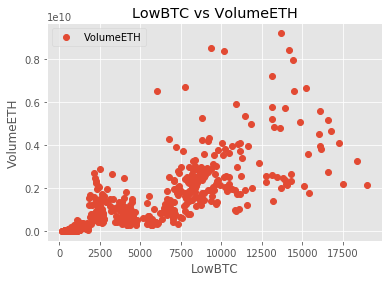

0.8309914672107963

In [56]:
df.plot(x='LowBTC', y='VolumeETH', style='o')  
plt.title('LowBTC vs VolumeETH')  
plt.xlabel('LowBTC')  
plt.ylabel('VolumeETH')  
plt.show()

df['LowBTC'].corr(df['VolumeETH'])

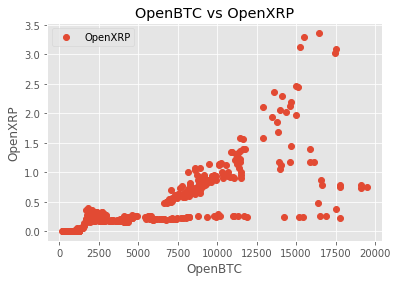

0.8381504356820003

In [57]:
#Scatterplots for BTC vs XRP Open-Open High-High Volume-Volume Open-Volume High-Volume 

df.plot(x='OpenBTC', y='OpenXRP', style='o')  
plt.title('OpenBTC vs OpenXRP')  
plt.xlabel('OpenBTC')  
plt.ylabel('OpenXRP')  
plt.show()

df['OpenBTC'].corr(df['OpenXRP'])

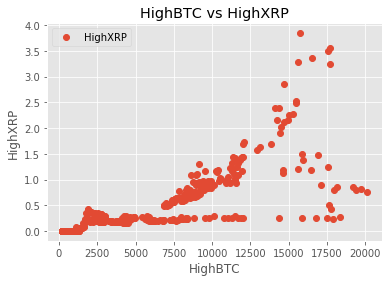

0.8294427138015789

In [58]:
df.plot(x='HighBTC', y='HighXRP', style='o')  
plt.title('HighBTC vs HighXRP')  
plt.xlabel('HighBTC')  
plt.ylabel('HighXRP')  
plt.show()

df['HighBTC'].corr(df['HighXRP'])

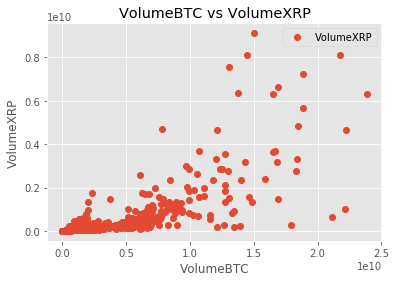

0.7657171585778104

In [59]:
df.plot(x='VolumeBTC', y='VolumeXRP', style='o')  
plt.title('VolumeBTC vs VolumeXRP')  
plt.xlabel('VolumeBTC')  
plt.ylabel('VolumeXRP')  
plt.show()

df['VolumeBTC'].corr(df['VolumeXRP'])

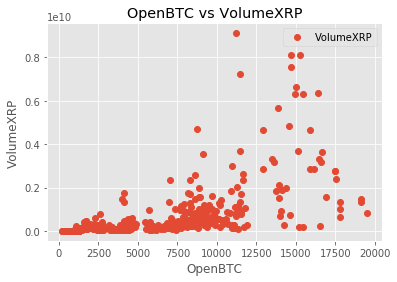

0.6504145134368026

In [60]:
df.plot(x='OpenBTC', y='VolumeXRP', style='o')  
plt.title('OpenBTC vs VolumeXRP')  
plt.xlabel('OpenBTC')  
plt.ylabel('VolumeXRP')  
plt.show()

df['OpenBTC'].corr(df['VolumeXRP'])

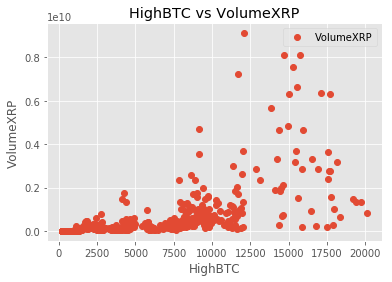

0.6500481347071735

In [61]:
df.plot(x='HighBTC', y='VolumeXRP', style='o')  
plt.title('HighBTC vs VolumeXRP')  
plt.xlabel('HighBTC')  
plt.ylabel('VolumeXRP')  
plt.show()

df['HighBTC'].corr(df['VolumeXRP'])

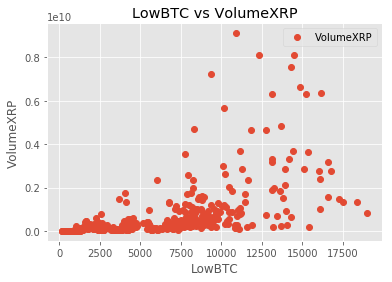

0.636351710334719

In [62]:
df.plot(x='LowBTC', y='VolumeXRP', style='o')  
plt.title('LowBTC vs VolumeXRP')  
plt.xlabel('LowBTC')  
plt.ylabel('VolumeXRP')  
plt.show()

df['LowBTC'].corr(df['VolumeXRP'])

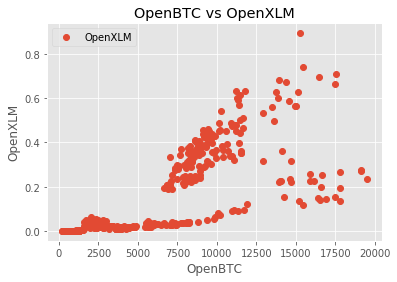

0.8266395109287248

In [63]:
#Scatterplots for BTC vs XLM Open-Open High-High Volume-Volume Open-Volume High-Volume 

df.plot(x='OpenBTC', y='OpenXLM', style='o')  
plt.title('OpenBTC vs OpenXLM')  
plt.xlabel('OpenBTC')  
plt.ylabel('OpenXLM')  
plt.show()

df['OpenBTC'].corr(df['OpenXLM'])

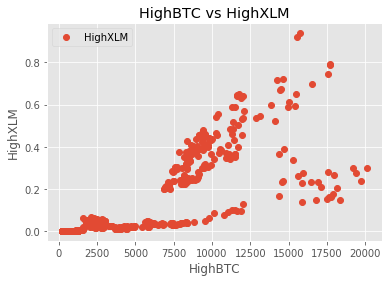

0.8262637484774568

In [64]:
df.plot(x='HighBTC', y='HighXLM', style='o')  
plt.title('HighBTC vs HighXLM')  
plt.xlabel('HighBTC')  
plt.ylabel('HighXLM')  
plt.show()

df['HighBTC'].corr(df['HighXLM'])

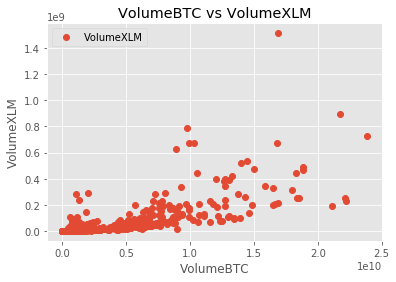

0.7418919712882283

In [65]:
df.plot(x='VolumeBTC', y='VolumeXLM', style='o')  
plt.title('VolumeBTC vs VolumeXLM')  
plt.xlabel('VolumeBTC')  
plt.ylabel('VolumeXLM')  
plt.show()

df['VolumeBTC'].corr(df['VolumeXLM'])

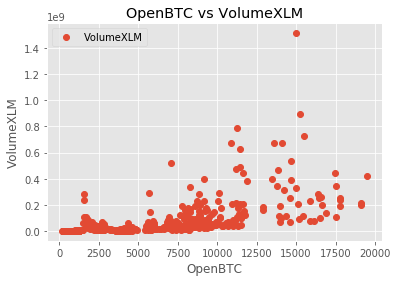

0.6426962335722768

In [66]:
df.plot(x='OpenBTC', y='VolumeXLM', style='o')  
plt.title('OpenBTC vs VolumeXLM')  
plt.xlabel('OpenBTC')  
plt.ylabel('VolumeXLM')  
plt.show()

df['OpenBTC'].corr(df['VolumeXLM'])

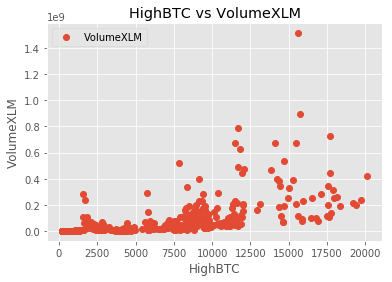

0.6472427106123979

In [67]:
df.plot(x='HighBTC', y='VolumeXLM', style='o')  
plt.title('HighBTC vs VolumeXLM')  
plt.xlabel('HighBTC')  
plt.ylabel('VolumeXLM')  
plt.show()

df['HighBTC'].corr(df['VolumeXLM'])

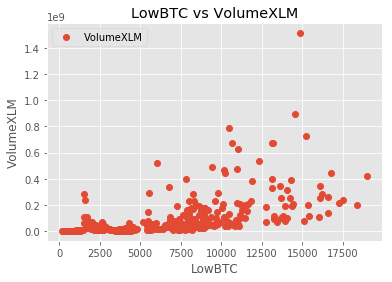

0.6366728859597979

In [68]:
df.plot(x='LowBTC', y='VolumeXLM', style='o')  
plt.title('LowBTC vs VolumeXLM')  
plt.xlabel('LowBTC')  
plt.ylabel('VolumeXLM')  
plt.show()

df['LowBTC'].corr(df['VolumeXLM'])